In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/meat-quality-assessment-based-on-deep-learning/README.txt
/kaggle/input/meat-quality-assessment-based-on-deep-learning/license.txt
/kaggle/input/meat-quality-assessment-based-on-deep-learning/Fresh/test_20171016_165121D.jpg
/kaggle/input/meat-quality-assessment-based-on-deep-learning/Fresh/test_20171016_203521D.jpg
/kaggle/input/meat-quality-assessment-based-on-deep-learning/Fresh/test_20171016_195721D.jpg
/kaggle/input/meat-quality-assessment-based-on-deep-learning/Fresh/test_20171017_113721D.jpg
/kaggle/input/meat-quality-assessment-based-on-deep-learning/Fresh/test_20171017_163721D.jpg
/kaggle/input/meat-quality-assessment-based-on-deep-learning/Fresh/test_20171017_130521D.jpg
/kaggle/input/meat-quality-assessment-based-on-deep-learning/Fresh/test_20171016_182521D.jpg
/kaggle/input/meat-quality-assessment-based-on-deep-learning/Fresh/test_20171016_173921D.jpg
/kaggle/input/meat-quality-assessment-based-on-deep-learning/Fresh/test_20171017_142921D.jpg
/kaggle/input/meat

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

In [4]:
Meat_Data_Data = Path("../input/meat-quality-assessment-based-on-deep-learning")

In [5]:
JPG_Path = list(Meat_Data_Data.glob(r"*/*.jpg"))

In [6]:
Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],JPG_Path))
# splitting fresh and spoiled

In [7]:
Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],JPG_Path))
# splitting fresh and spoiled

In [13]:
File_Path = pd.Series(JPG_Path,name="JPG").astype(str)

In [14]:
Label_Name = pd.Series(Labels,name="CATEGORY")
print(Label_Name.value_counts())

Spoiled    948
Fresh      948
Name: CATEGORY, dtype: int64


In [15]:
Main_Data = pd.concat([File_Path,Label_Name],axis=1)

In [16]:
Main_Data.head()

,JPG,CATEGORY
0,../input/meat-quality-assessment-based-on-deep...,Fresh
1,../input/meat-quality-assessment-based-on-deep...,Fresh
2,../input/meat-quality-assessment-based-on-deep...,Fresh
3,../input/meat-quality-assessment-based-on-deep...,Fresh
4,../input/meat-quality-assessment-based-on-deep...,Fresh


In [19]:
Main_Data = Main_Data.sample(frac=1).reset_index(drop=True)
# we need to shuffle it, because of perfect training

In [23]:
print(Main_Data.head(100))

                                                  JPG CATEGORY
0   ../input/meat-quality-assessment-based-on-deep...  Spoiled
1   ../input/meat-quality-assessment-based-on-deep...  Spoiled
2   ../input/meat-quality-assessment-based-on-deep...  Spoiled
3   ../input/meat-quality-assessment-based-on-deep...  Spoiled
4   ../input/meat-quality-assessment-based-on-deep...  Spoiled
..                                                ...      ...
95  ../input/meat-quality-assessment-based-on-deep...    Fresh
96  ../input/meat-quality-assessment-based-on-deep...  Spoiled
97  ../input/meat-quality-assessment-based-on-deep...    Fresh
98  ../input/meat-quality-assessment-based-on-deep...  Spoiled
99  ../input/meat-quality-assessment-based-on-deep...    Fresh

[100 rows x 2 columns]


In [24]:
Fresh_Meat = Main_Data[Main_Data["CATEGORY"] == "Fresh"]
Spoiled_Meat = Main_Data[Main_Data["CATEGORY"] == "Spoiled"]

In [32]:
Train_Data, Test_Data = train_test_split(Main_Data, train_size=0.7, shuffle=True, random_state=42)
# 70 % training and 30% testing data

In [33]:
print(Train_Data.shape)
print(Test_Data.shape)

(1327, 2)
(569, 2)


In [36]:
Data_Generator = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [37]:
Train_Gen = Data_Generator.flow_from_dataframe(dataframe=Train_Data,
                                               x_col="JPG",
                                               y_col="CATEGORY",
                                               shuffle=True,seed=42,
                                               color_mode="rgb",
                                               class_mode="categorical",
                                               batch_size=32,
                                               subset="training")

Found 1062 validated image filenames belonging to 2 classes.


In [38]:
Test_Gen = Data_Generator.flow_from_dataframe(dataframe=Test_Data,
                                               x_col="JPG",
                                               y_col="CATEGORY",
                                               shuffle=False,seed=42,
                                               color_mode="rgb",
                                               class_mode="categorical",
                                               batch_size=32)

Found 569 validated image filenames belonging to 2 classes.


In [39]:
Validation_Gen = Data_Generator.flow_from_dataframe(dataframe=Train_Data,
                                               x_col="JPG",
                                               y_col="CATEGORY",
                                               shuffle=True,seed=42,
                                               color_mode="rgb",
                                               class_mode="categorical",
                                               batch_size=32,
                                               subset="validation")

Found 265 validated image filenames belonging to 2 classes.


In [43]:
model = tf.keras.models.Sequential([
  
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Flatten(input_shape=(113,)),
  
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
 
  
  tf.keras.layers.Dense(2,activation="softmax")
])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, None, None, None)  0         
_________________________________________________________________
flatten (Flatten)            (None, None)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                12582976  
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               3

In [44]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [45]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=2)


In [46]:
ANN_Model = model.fit(Train_Gen,
                     validation_data=Validation_Gen,
                     epochs=10,batch_size=5,
                     callbacks=Call_Back)

Epoch 1/10
34/34 [==============================] - 32s 932ms/step - loss: 0.6741 - accuracy: 0.5435 - val_loss: 0.2850 - val_accuracy: 0.9585
Epoch 2/10
34/34 [==============================] - 22s 635ms/step - loss: 0.2448 - accuracy: 0.9131 - val_loss: 0.0732 - val_accuracy: 0.9660
Epoch 3/10
34/34 [==============================] - 21s 631ms/step - loss: 0.1489 - accuracy: 0.9379 - val_loss: 0.0828 - val_accuracy: 0.9660
Epoch 4/10
34/34 [==============================] - 21s 630ms/step - loss: 0.1490 - accuracy: 0.9350 - val_loss: 0.0405 - val_accuracy: 0.9887
Epoch 5/10
34/34 [==============================] - 21s 631ms/step - loss: 0.0825 - accuracy: 0.9673 - val_loss: 0.0752 - val_accuracy: 0.9774
Epoch 6/10
34/34 [==============================] - 21s 631ms/step - loss: 0.1226 - accuracy: 0.9386 - val_loss: 0.0521 - val_accuracy: 0.9887
Epoch 7/10
34/34 [==============================] - 21s 630ms/step - loss: 0.1164 - accuracy: 0.9527 - val_loss: 0.0533 - val_accuracy: 0.9887

In [47]:
Model_Results = model.evaluate(Test_Gen,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.0673
ACCURACY:  0.97


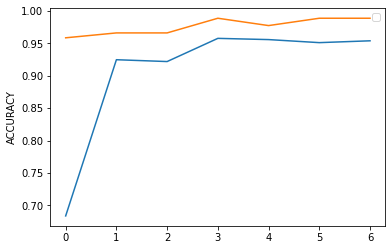

In [49]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

In [50]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

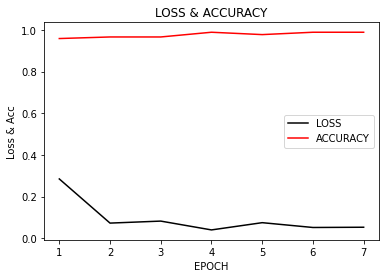

In [51]:
plt.plot(epochs,val_losses,"k-",label="LOSS")
plt.plot(epochs,val_acc,"r",label="ACCURACY")
plt.title("LOSS & ACCURACY")
plt.xlabel("EPOCH")
plt.ylabel("Loss & Acc")
plt.legend()
plt.show()

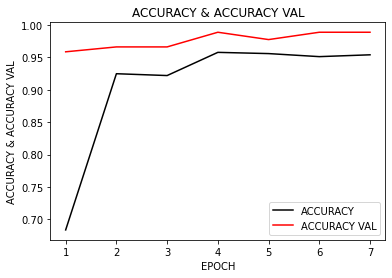

In [52]:
plt.plot(epochs,acc,"k-",label="ACCURACY")
plt.plot(epochs,val_acc,"r",label="ACCURACY VAL")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

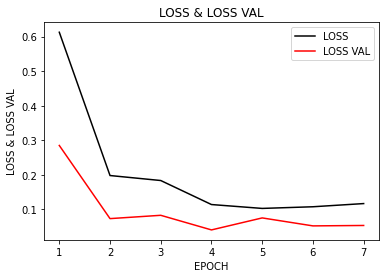

In [53]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"r",label="LOSS VAL")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

In [54]:
Model_Predict = model.predict(Test_Gen)

In [55]:
Model_Predict = np.argmax(Model_Predict,axis=1)

In [56]:
Predict_Label = (Test_Gen.class_indices)
Predict_Label = dict((v,k) for k,v in Predict_Label.items())

In [57]:
Model_Predict = [Predict_Label[k] for k in Model_Predict]

NameError: name 'Test_Results' is not defined